In [1]:
# Part 1: Data Preprocessing and Visualization
## Hurricane Damage Classification Project
## By Keshav Bhargava and Sanjay Senthil

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:

DATA_DIR = 'data/Project2'
DAMAGE_DIR = os.path.join(DATA_DIR, 'damage')
NO_DAMAGE_DIR = os.path.join(DATA_DIR, 'no_damage')
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.15
TEST_SPLIT = 0.15
EPOCHS = 7

In [5]:
damage_files = os.listdir(DAMAGE_DIR)
no_damage_files = os.listdir(NO_DAMAGE_DIR)
print(f"\nDamage images: {len(damage_files)}")
print(f"No damage images: {len(no_damage_files)}")
print(f"Total images: {len(damage_files) + len(no_damage_files)}")


Damage images: 14170
No damage images: 7152
Total images: 21322


In [ ]:
sample_damage = Image.open(os.path.join(DAMAGE_DIR, damage_files[0]))
sample_no_damage = Image.open(os.path.join(NO_DAMAGE_DIR, no_damage_files[0]))

print("\nSample Image Analysis:")
print(f"  Damage sample - Size: {sample_damage.size}, Mode: {sample_damage.mode}")
print(f"  No damage sample - Size: {sample_no_damage.size}, Mode: {sample_no_damage.mode}")


Sample Image Analysis:
  Damage sample - Size: (128, 128), Mode: RGB
  No damage sample - Size: (128, 128), Mode: RGB


In [ ]:
# The code below was generated by AI; see [1].

# Check image dimension variability
print("\nChecking image dimension variability...")
damage_sizes = []
no_damage_sizes = []

# Sample 100 images from each class
for fname in damage_files[:100]:
    img = Image.open(os.path.join(DAMAGE_DIR, fname))
    damage_sizes.append(img.size)

for fname in no_damage_files[:100]:
    img = Image.open(os.path.join(NO_DAMAGE_DIR, fname))
    no_damage_sizes.append(img.size)

unique_sizes = set(damage_sizes + no_damage_sizes)
print(f"  Unique image sizes (from sample of 200): {len(unique_sizes)}")
if len(unique_sizes) <= 5:
    for size in unique_sizes:
        count = (damage_sizes + no_damage_sizes).count(size)
        print(f"    {size}: {count} images")


Checking image dimension variability...
  Unique image sizes (from sample of 200): 1
    (128, 128): 200 images


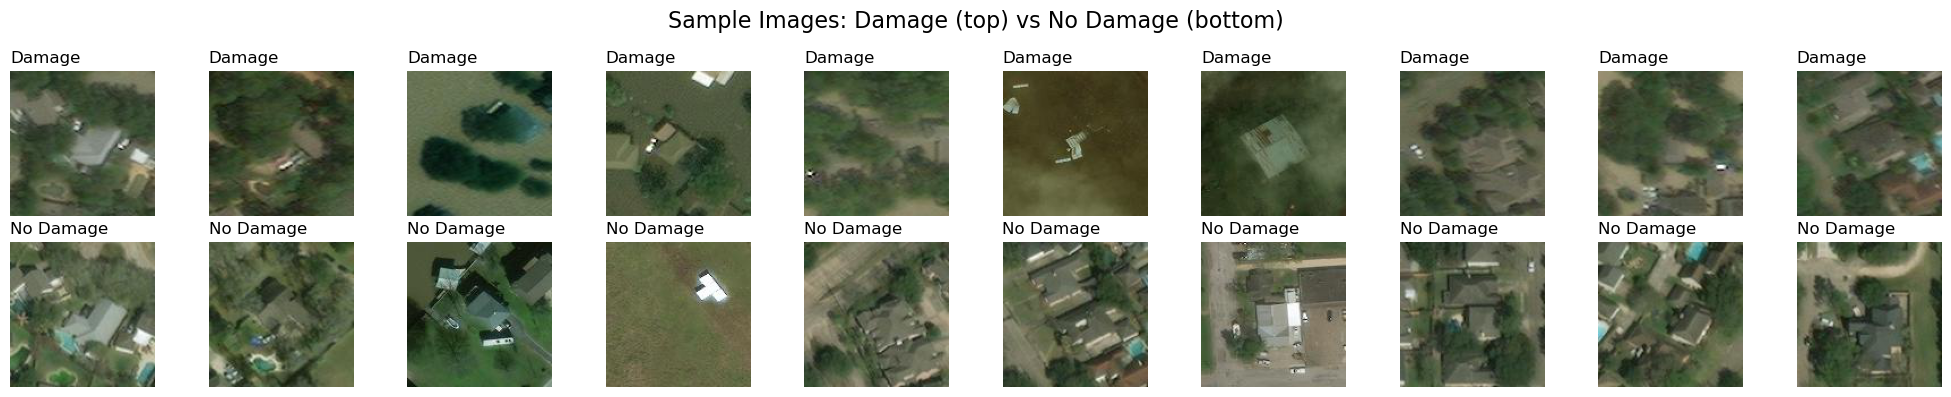

In [ ]:
num_samples = 10

fig, axes = plt.subplots(2, num_samples, figsize=(20, 4))
fig.suptitle('Sample Images: Damage (top) vs No Damage (bottom)', fontsize=16)

for i in range(num_samples):
    img = Image.open(os.path.join(DAMAGE_DIR, damage_files[i]))
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title('Damage', fontsize=12, loc='left')

for i in range(num_samples):
    img = Image.open(os.path.join(NO_DAMAGE_DIR, no_damage_files[i]))
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title('No Damage', fontsize=12, loc='left')

plt.tight_layout()
plt.savefig('sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# The code below was generated by AI; see [2].
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.15
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    seed=42
)

Found 3197 images belonging to 2 classes.
Found 21322 images belonging to 2 classes.


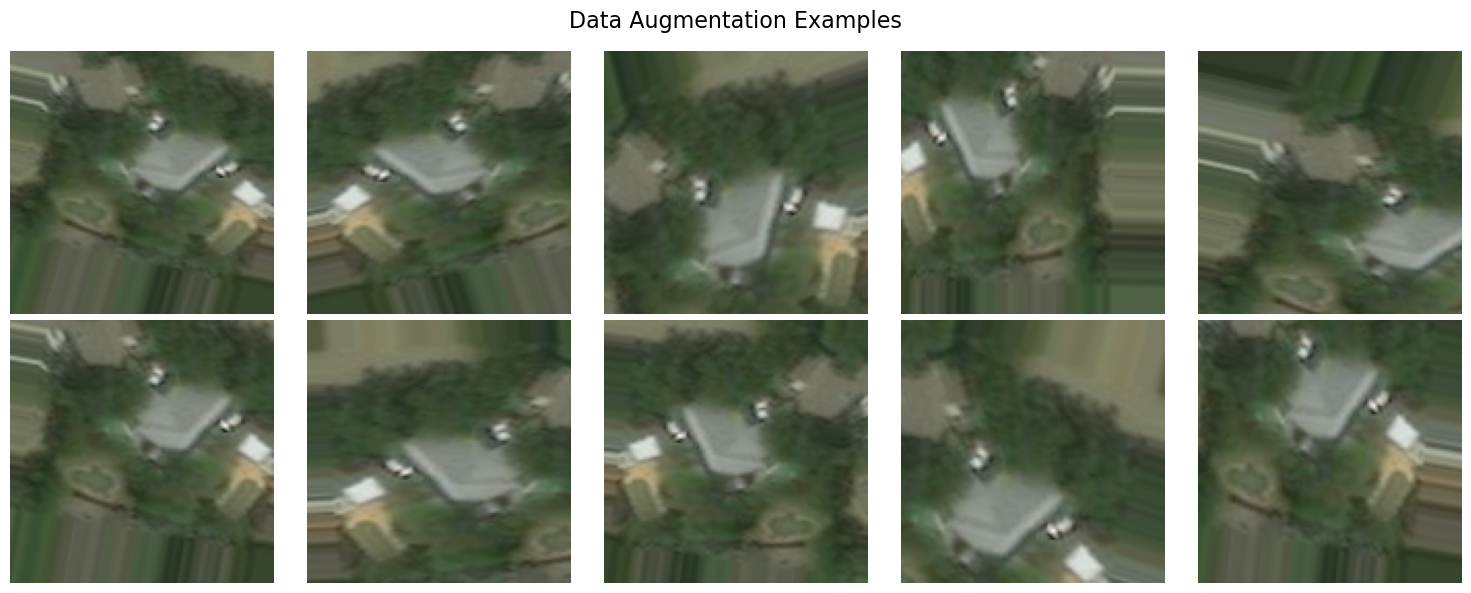

In [ ]:
# The code below was generated by AI; see [3].
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

sample_img = Image.open(os.path.join(DAMAGE_DIR, damage_files[0]))
sample_img = sample_img.resize((IMG_HEIGHT, IMG_WIDTH))
img_array = np.array(sample_img)
img_array = img_array.reshape((1,) + img_array.shape)

# Generate augmented samples
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Data Augmentation Examples', fontsize=16)

i = 0
for batch in datagen.flow(img_array, batch_size=1):
    ax = axes[i // 5, i % 5]
    ax.imshow(batch[0].astype('uint8'))
    ax.axis('off')
    i += 1
    if i >= 10:
        break

plt.tight_layout()
plt.savefig('augmentation_samples.png', dpi=150, bbox_inches='tight')
plt.show()

In [14]:
# Part 2: Model Design, Training and Evaluation

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf

In [16]:
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    seed=42
)

Found 18125 images belonging to 2 classes.
Found 3197 images belonging to 2 classes.
Found 21322 images belonging to 2 classes.


In [ ]:
model_dense = Sequential()
model_dense.add(Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model_dense.add(Dense(512, activation='relu'))
model_dense.add(Dropout(0.3))

# Hidden layer 1
model_dense.add(Dense(256, activation='relu'))
model_dense.add(Dropout(0.3))

# Hidden layer 2
model_dense.add(Dense(128, activation='relu'))
model_dense.add(Dropout(0.3))

# Hidden layer 3
model_dense.add(Dense(64, activation='relu'))

model_dense.add(Dense(1, activation='sigmoid'))
print("\nModel Architecture:")
model_dense.summary()


Model Architecture:


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,338,881 (96.66 MB)

 Trainable params: 25,338,881 (96.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_dense.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# The code below was generated by AI; see [4].
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'dense_ann_best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Training
history_dense = model_dense.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping, checkpoint],
    verbose=2
)

Epoch 1/7

Epoch 1: val_accuracy improved from None to 0.66469, saving model to dense_ann_best.keras
567/567 - 84s - 148ms/step - accuracy: 0.6415 - loss: 0.8564 - val_accuracy: 0.6647 - val_loss: 0.6381
Epoch 2/7

Epoch 2: val_accuracy did not improve from 0.66469
567/567 - 70s - 124ms/step - accuracy: 0.6638 - loss: 0.6396 - val_accuracy: 0.6647 - val_loss: 0.6380
Epoch 3/7

Epoch 3: val_accuracy did not improve from 0.66469
567/567 - 61s - 108ms/step - accuracy: 0.6645 - loss: 0.6384 - val_accuracy: 0.6647 - val_loss: 0.6379
Epoch 4/7

Epoch 4: val_accuracy did not improve from 0.66469
567/567 - 61s - 107ms/step - accuracy: 0.6645 - loss: 0.6383 - val_accuracy: 0.6647 - val_loss: 0.6380
Epoch 5/7

Epoch 5: val_accuracy did not improve from 0.66469
567/567 - 59s - 104ms/step - accuracy: 0.6646 - loss: 0.6384 - val_accuracy: 0.6647 - val_loss: 0.6379
Epoch 6/7

Epoch 6: val_accuracy did not improve from 0.66469
567/567 - 62s - 110ms/step - accuracy: 0.6645 - loss: 0.6383 - val_accurac

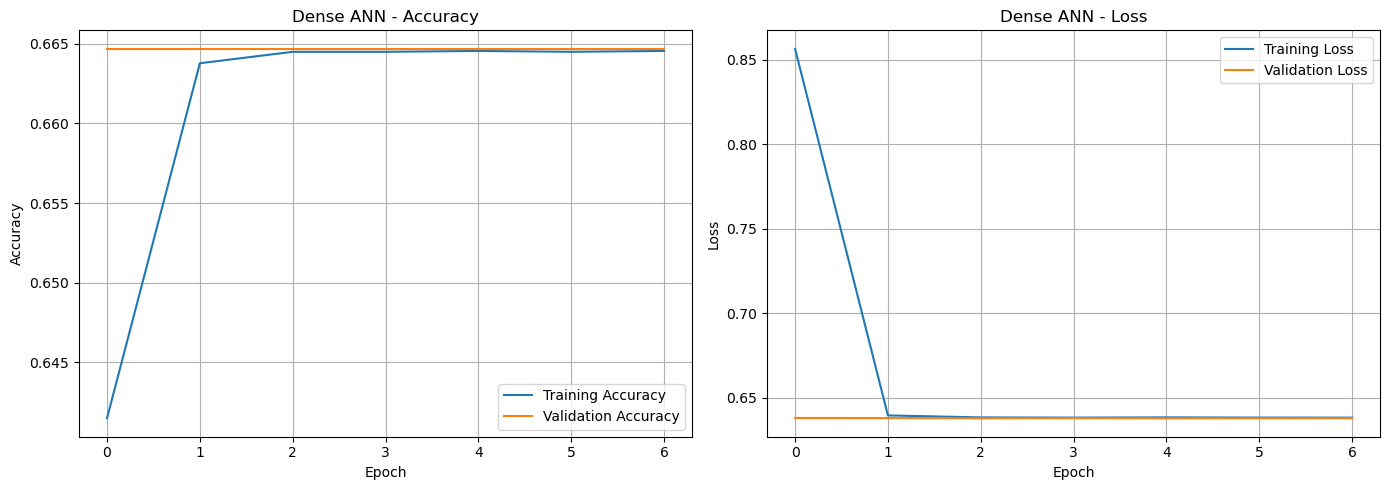

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
ax1.plot(history_dense.history['accuracy'], label='Training Accuracy')
ax1.plot(history_dense.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Dense ANN - Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss
ax2.plot(history_dense.history['loss'], label='Training Loss')
ax2.plot(history_dense.history['val_loss'], label='Validation Loss')
ax2.set_title('Dense ANN - Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('dense_ann_training_history.png', dpi=150, bbox_inches='tight')
plt.show()

In [20]:
test_loss_dense, test_accuracy_dense = model_dense.evaluate(test_generator, verbose=0)
print(f"Dense ANN Test Results:")
print(f"  Test Loss: {test_loss_dense:.4f}")
print(f"  Test Accuracy: {test_accuracy_dense:.4f}")

Dense ANN Test Results:
  Test Loss: 0.6380
  Test Accuracy: 0.6646


In [21]:
# --- LeNet-5 CNN ---

In [22]:
model_lenet5 = Sequential()
model_lenet5.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model_lenet5.add(AveragePooling2D(pool_size=(2, 2)))
model_lenet5.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_lenet5.add(AveragePooling2D(pool_size=(2, 2)))
model_lenet5.add(Flatten())
model_lenet5.add(Dense(120, activation='relu'))
model_lenet5.add(Dense(84, activation='relu'))
model_lenet5.add(Dense(1, activation='sigmoid'))
model_lenet5.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,961 (6.21 MB)

 Trainable params: 1,627,961 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_lenet5.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# The code below was generated by AI; see [5].
early_stopping_lenet5 = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint_lenet5 = ModelCheckpoint(
    'lenet5_best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

history_lenet5 = model_lenet5.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping_lenet5, checkpoint_lenet5],
    verbose=2
)

Epoch 1/7

Epoch 1: val_accuracy improved from None to 0.73100, saving model to lenet5_best.keras
567/567 - 60s - 105ms/step - accuracy: 0.8076 - loss: 0.4415 - val_accuracy: 0.7310 - val_loss: 0.6004
Epoch 2/7

Epoch 2: val_accuracy did not improve from 0.73100
567/567 - 60s - 105ms/step - accuracy: 0.8838 - loss: 0.3055 - val_accuracy: 0.7285 - val_loss: 0.6012
Epoch 3/7

Epoch 3: val_accuracy improved from 0.73100 to 0.83047, saving model to lenet5_best.keras
567/567 - 56s - 98ms/step - accuracy: 0.9079 - loss: 0.2469 - val_accuracy: 0.8305 - val_loss: 0.4518
Epoch 4/7

Epoch 4: val_accuracy improved from 0.83047 to 0.86738, saving model to lenet5_best.keras
567/567 - 55s - 98ms/step - accuracy: 0.9132 - loss: 0.2345 - val_accuracy: 0.8674 - val_loss: 0.3058
Epoch 5/7

Epoch 5: val_accuracy improved from 0.86738 to 0.89240, saving model to lenet5_best.keras
567/567 - 57s - 100ms/step - accuracy: 0.9215 - loss: 0.2008 - val_accuracy: 0.8924 - val_loss: 0.2575
Epoch 6/7

Epoch 6: val_

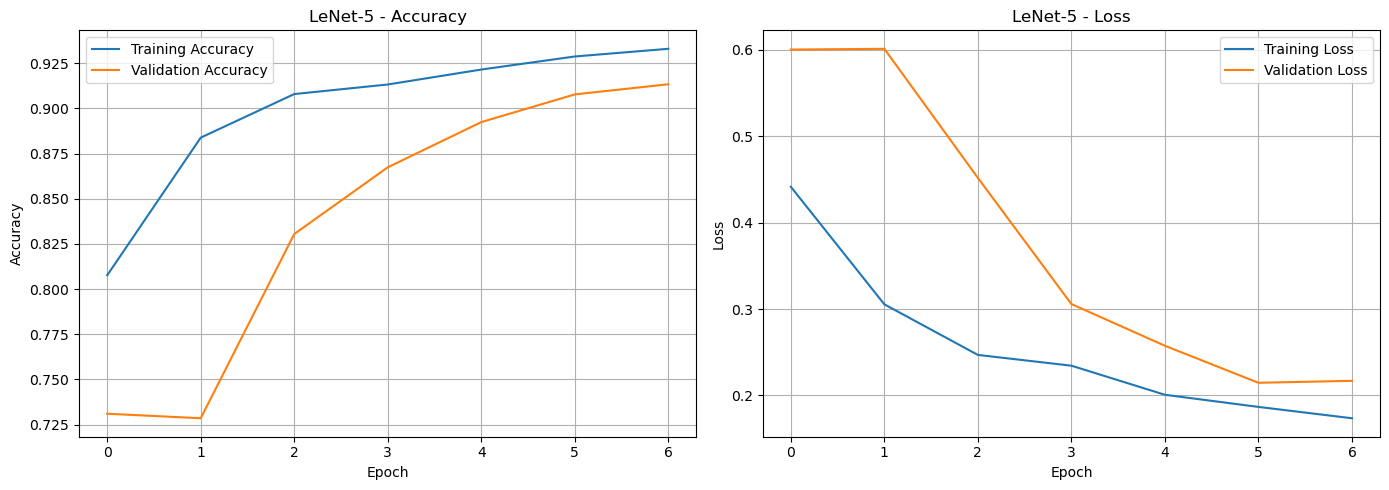

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
ax1.plot(history_lenet5.history['accuracy'], label='Training Accuracy')
ax1.plot(history_lenet5.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('LeNet-5 - Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss
ax2.plot(history_lenet5.history['loss'], label='Training Loss')
ax2.plot(history_lenet5.history['val_loss'], label='Validation Loss')
ax2.set_title('LeNet-5 - Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('lenet5_training_history.png', dpi=150, bbox_inches='tight')
plt.show()

In [25]:
test_loss_lenet5, test_accuracy_lenet5 = model_lenet5.evaluate(test_generator, verbose=0)
print(f"LeNet-5 Test Results:")
print(f"  Test Loss: {test_loss_lenet5:.4f}")
print(f"  Test Accuracy: {test_accuracy_lenet5:.4f}")

LeNet-5 Test Results:
  Test Loss: 0.1658
  Test Accuracy: 0.9340


In [ ]:
# Model 3: Alternate-LeNet-5 CNN

In [26]:
model_alt_lenet5 = Sequential()
model_alt_lenet5.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model_alt_lenet5.add(MaxPooling2D(pool_size=(2, 2)))
model_alt_lenet5.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model_alt_lenet5.add(MaxPooling2D(pool_size=(2, 2)))
model_alt_lenet5.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_alt_lenet5.add(MaxPooling2D(pool_size=(2, 2)))
model_alt_lenet5.add(Flatten())
model_alt_lenet5.add(Dense(256, activation='relu'))
model_alt_lenet5.add(Dropout(0.5))
model_alt_lenet5.add(Dense(128, activation='relu'))
model_alt_lenet5.add(Dropout(0.3))
model_alt_lenet5.add(Dense(1, activation='sigmoid'))
model_alt_lenet5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     5,538,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,698,625 (21.74 MB)

 Trainable params: 5,698,625 (21.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_alt_lenet5.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# The code below was generated by AI; see [6].
early_stopping_alt = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint_alt = ModelCheckpoint(
    'alternate_lenet5_best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

history_alt = model_alt_lenet5.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping_alt, checkpoint_alt],
    verbose=2
)

Epoch 1/7

Epoch 1: val_accuracy improved from None to 0.65561, saving model to alternate_lenet5_best.keras
567/567 - 161s - 284ms/step - accuracy: 0.8159 - loss: 0.4173 - val_accuracy: 0.6556 - val_loss: 0.7114
Epoch 2/7

Epoch 2: val_accuracy improved from 0.65561 to 0.80482, saving model to alternate_lenet5_best.keras
567/567 - 159s - 281ms/step - accuracy: 0.8886 - loss: 0.2957 - val_accuracy: 0.8048 - val_loss: 0.4186
Epoch 3/7

Epoch 3: val_accuracy improved from 0.80482 to 0.82890, saving model to alternate_lenet5_best.keras
567/567 - 165s - 291ms/step - accuracy: 0.9098 - loss: 0.2480 - val_accuracy: 0.8289 - val_loss: 0.3680
Epoch 4/7

Epoch 4: val_accuracy improved from 0.82890 to 0.85142, saving model to alternate_lenet5_best.keras
567/567 - 175s - 309ms/step - accuracy: 0.9129 - loss: 0.2267 - val_accuracy: 0.8514 - val_loss: 0.3520
Epoch 5/7

Epoch 5: val_accuracy improved from 0.85142 to 0.88364, saving model to alternate_lenet5_best.keras
567/567 - 189s - 334ms/step - ac

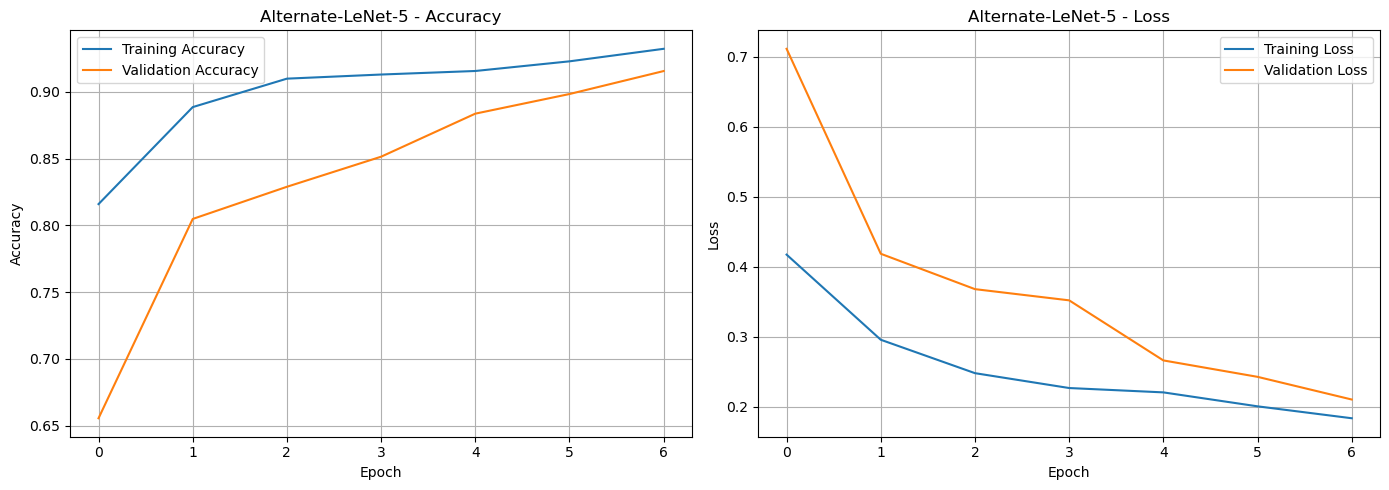

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
ax1.plot(history_alt.history['accuracy'], label='Training Accuracy')
ax1.plot(history_alt.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Alternate-LeNet-5 - Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss
ax2.plot(history_alt.history['loss'], label='Training Loss')
ax2.plot(history_alt.history['val_loss'], label='Validation Loss')
ax2.set_title('Alternate-LeNet-5 - Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('alternate_lenet5_training_history.png', dpi=150, bbox_inches='tight')
plt.show()

In [29]:
test_generator.reset()
test_loss_alt, test_accuracy_alt = model_alt_lenet5.evaluate(test_generator, verbose=0)
print(f"Alternate-LeNet-5 Test Results:")
print(f"  Test Loss: {test_loss_alt:.4f}")
print(f"  Test Accuracy: {test_accuracy_alt:.4f}")

Alternate-LeNet-5 Test Results:
  Test Loss: 0.1471
  Test Accuracy: 0.9371


In [ ]:
# The code below was generated by AI; see [7].
results = {
    'Dense ANN': {'accuracy': test_accuracy_dense, 'loss': test_loss_dense},
    'LeNet-5': {'accuracy': test_accuracy_lenet5, 'loss': test_loss_lenet5},
    'Alternate LeNet-5': {'accuracy': test_accuracy_alt, 'loss': test_loss_alt}
}

print("=" * 60)
print("FINAL MODEL COMPARISON")
print("=" * 60)
for model_name, metrics in results.items():
    print(f"{model_name:20s} - Accuracy: {metrics['accuracy']:.4f}, Loss: {metrics['loss']:.4f}")

# Determine best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")

FINAL MODEL COMPARISON
Dense ANN            - Accuracy: 0.6646, Loss: 0.6380
LeNet-5              - Accuracy: 0.9340, Loss: 0.1658
Alternate LeNet-5    - Accuracy: 0.9371, Loss: 0.1471

Best Model: Alternate LeNet-5 with accuracy 0.9371


In [31]:
with open('best_model_info.txt', 'w') as f:
    f.write(f"Best Model: {best_model_name}\n")
    f.write(f"Test Accuracy: {results[best_model_name]['accuracy']:.4f}\n")
    f.write(f"Test Loss: {results[best_model_name]['loss']:.4f}\n")

print(f"\nBest model info saved to 'best_model_info.txt'")
print(f"Best model saved as: {best_model_name.lower().replace(' ', '_').replace('-', '_')}_best.keras")


Best model info saved to 'best_model_info.txt'
Best model saved as: alternate_lenet_5_best.keras
